In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from geodatasets import get_path
import folium
from folium.plugins.heat_map import HeatMap

C:\Users\raj\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
url = "https://drive.google.com/file/d/1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y/view?usp=drive_link"
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Task3: Geographic Analysis

**Q.1) Plot the locations of restaurants on a map using \
longitude and latitude
coordinates.**

In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
print(df[['Longitude','Latitude']])

       Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]


In [5]:
# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
print(gdf.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

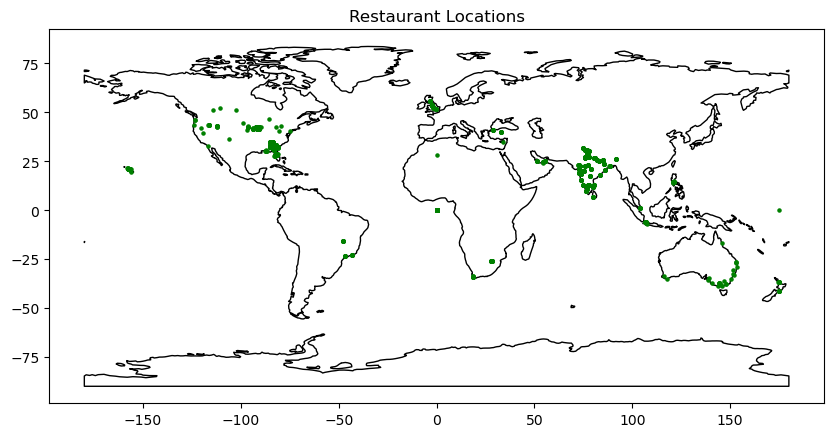

In [11]:
# Load the world map data
world = gpd.read_file(get_path('naturalearth.land'))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='white', edgecolor='black')

# Plot the restaurant locations
gdf.plot(ax=ax, marker='o', color='green', markersize=5)

# Set the title
plt.title('Restaurant Locations')

# Save the plot as a PNG file
plt.savefig('restaurant_locations.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

**Q.2) Identify any patterns or clusters of
restaurants in specific areas.**

In [7]:
# Calculate the mean latitude and longitude from the DataFrame
latitude_mean = df['Latitude'].mean()
longitude_mean = df['Longitude'].mean()

# Create a Folium map centered on the mean latitude and longitude
world_map = folium.Map(location=[latitude_mean, longitude_mean], 
    zoom_start=1, 
    height='200%', 
    width='200%')


In [9]:
from folium.plugins import HeatMap

# Generate heatmap data from DataFrame
heatmap_data = [
    [row['Latitude'], row['Longitude']]
    for _, row in df.iterrows()
]

# Create a Folium map
world_map = folium.Map(
    location=[df['Latitude'].mean(), df['Longitude'].mean()],
    zoom_start=1,
    height='200%',
    width='200%')

# Add HeatMap layer to the map
HeatMap(heatmap_data, radius=10).add_to(world_map)


In [10]:
world_map